## python-CTD to plot cnv file from Station 33/P1, April 2018 (Revelle, RR1804)

## 3500 m cast on Apr 23 2018

## downloaded Al's 'ave' cnv files from the POMZ shared drive

In [1]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [2]:
import ctd


cast = ctd.from_cnv("RR18_Station33_P2_cast63.cnv")
down, up = cast.split()

down.head()

,timeS,scan,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,flSP,...,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
11.068,48.916,1175.0,-106.07344,20.26359,11.0,24.8934,24.8823,5.247989,5.246879,0.51056,...,0.0,2.7239,34.6398,34.6401,23.1018,23.1054,6.6139,202.020,97.302,False
12.074,81.918,1967.0,-106.07344,20.26360,12.0,24.4635,24.4669,5.197751,5.198526,0.65410,...,0.0,2.7091,34.5962,34.5993,23.1985,23.1999,6.6103,201.892,96.512,False
13.080,83.108,1996.0,-106.07344,20.26360,13.0,24.1590,24.1776,5.161954,5.164658,0.82750,...,0.0,2.7061,34.5625,34.5685,23.2638,23.2629,6.6641,203.520,96.769,False
14.087,85.629,2056.0,-106.07344,20.26360,14.0,23.5448,23.5742,5.094538,5.097694,1.46740,...,0.0,2.6932,34.5293,34.5304,23.4196,23.4119,6.6268,202.350,95.194,False
15.093,87.937,2111.0,-106.07344,20.26360,15.0,23.3026,23.3055,5.070765,5.071191,1.55150,...,0.0,2.6255,34.5368,34.5378,23.4958,23.4957,6.4407,196.653,92.134,False


In [3]:
type(cast)

pandas.core.frame.DataFrame

### Plot a second variable in a different axis so we can compare the two:

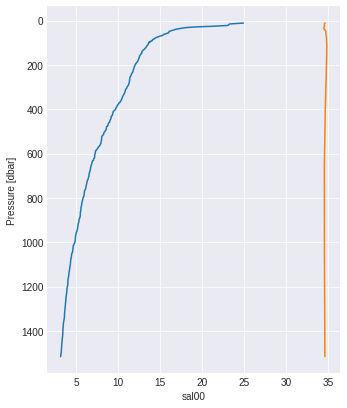

In [4]:
%matplotlib inline

from matplotlib import style

style.use("seaborn-darkgrid")


down["t090C"].plot_cast() # first temp sensor
down["sal00"].plot_cast() # conductivity [S/m]

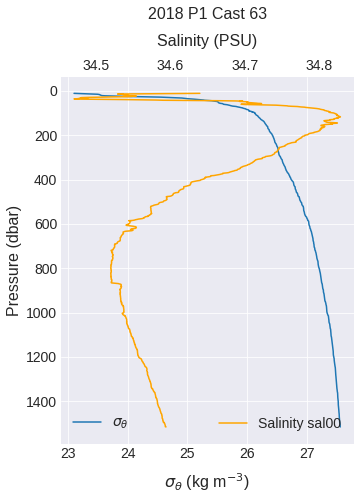

In [5]:
ax0 = down["sigma-�00"].plot_cast(label=r"$\sigma_{\theta}$")
ax1 = down["sal00"].plot_cast(
    ax=ax0,
    label="Salinity sal00",
    color="orange",
    secondary_y=True,
)


ax0.grid(True)
ax1.grid(False)

ax0.set_xlabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)", fontsize = 16, labelpad = 10)
ax1.set_xlabel('Salinity (PSU)', fontsize = 16, labelpad = 13)
ax0.set_ylabel('Pressure (dbar)', fontsize = 16)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax0.legend(loc="lower left", fontsize = 14)
ax1.legend(loc="lower right", fontsize = 14)

ax0.set_title('2018 P1 Cast 63', fontsize = 16, pad = 15);

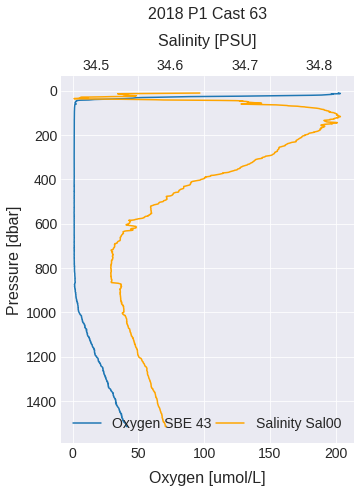

In [6]:
fig = ax0, ax1

ax0 = down["sbox0Mm/Kg"].plot_cast(label="Oxygen SBE 43")
ax1 = down["sal00"].plot_cast(
    ax=ax0,
    label="Salinity Sal00",
    color="orange",
    secondary_y=True,
)


ax0.grid(True)
ax1.grid(False)

ax0.set_ylabel('Pressure [dbar]', fontsize = 16)
ax0.set_xlabel('Oxygen [umol/L]', fontsize = 16, labelpad = 10)
ax1.set_xlabel('Salinity [PSU]', fontsize = 16, labelpad = 13)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax0.legend(loc="lower left", fontsize = 14)
ax1.legend(loc="lower right", fontsize = 14)

ax0.set_title('2018 P1 Cast 63', fontsize = 16, pad = 15);

In [7]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

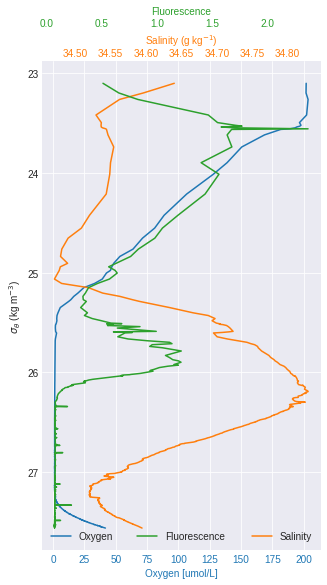

In [8]:
# density plot

import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast["sigma-�00"], color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")

(l1,) = ax1.plot(cast["sal00"], cast["sigma-�00"], color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast["sigma-�00"], color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

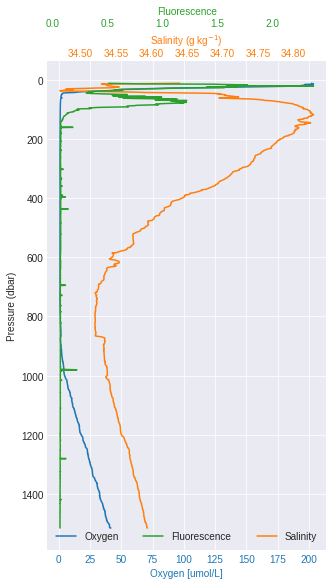

In [9]:
# depth plot 

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast.index, color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Pressure (dbar)')
#ax0.set_ylim([200,0])

(l1,) = ax1.plot(cast["sal00"], cast.index, color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast.index, color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

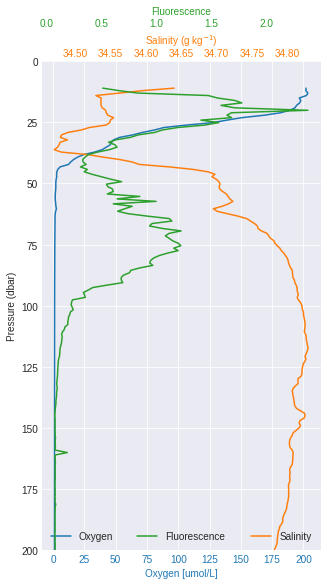

In [10]:
# depth plot but zoomed on upper oxycline

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast.index, color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Pressure (dbar)')
ax0.set_ylim([200,0])

(l1,) = ax1.plot(cast["sal00"], cast.index, color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast.index, color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

In [17]:
metadata = cast._metadata

metadata.keys()

dict_keys(['header', 'config', 'names', 'skiprows', 'time', 'lon', 'lat', 'name'])

### python-ctd saves the file metadata in a dictionary so that you have easy access later on.

### e.g., sensor serial #s and file creation metadata

In [18]:
print(metadata["header"])

* Sea-Bird SBE 9 Data File:
* FileName = C:\CTD\RR1805\Station32_cast57.hex
* Software Version Seasave V 7.26.6.26
* Temperature SN = 4307
* Conductivity SN = 4650
* Number of Bytes Per Scan = 44
* Number of Voltage Words = 5
* Number of Scans Averaged by the Deck Unit = 1
* Append System Time to Every Scan
* System UpLoad Time = Apr 20 2018 11:01:56
* NMEA Latitude = 16 59.06 N
* NMEA Longitude = 106 58.74 W
* NMEA UTC (Time) = Apr 20 2018 11:01:51
* Store Lat/Lon Data = Append to Every Scan
** Ship: Revell
** Station: On Deck
** Operator: nak
* System UTC = Apr 20 2018 11:01:56
*END*
